## Iris classification

In [1]:
## allowed packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# load the dataset
iris = load_iris(as_frame=True)
df = iris.frame # 150 rows, 5 columns: 4 features + target (0/1/2 = setosa/versicolor/virginica)

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


  setosa (class 0): 50 samples
  versicolor (class 1): 50 samples
  virginica (class 2): 50 samples
Total samples: 150



C:\Users\ecofo\miniconda3\envs\prep\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ecofo\miniconda3\envs\prep\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ecofo\miniconda3\envs\prep\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ecofo\miniconda3\envs\prep\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

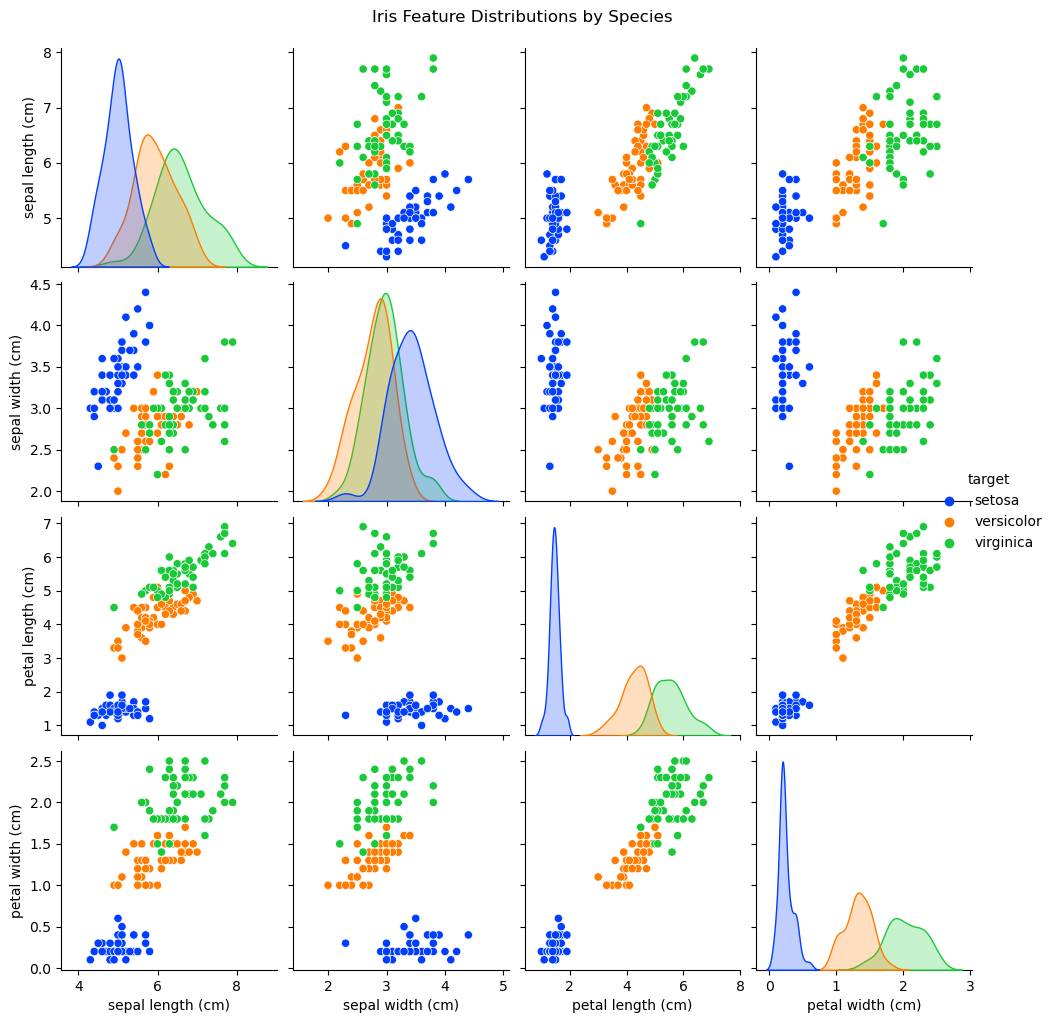

In [4]:
# Feature exploration 
# counts per flower species
for target_val, species_name in enumerate(iris.target_names):
    count = (df['target'] == target_val).sum()
    print(f"  {species_name} (class {target_val}): {count} samples")
print(f"Total samples: {len(df)}\n")

# create pair plot comparison for each feature
pairplot = sns.pairplot(df, hue="target", palette="bright", 
                        vars=["sepal length (cm)", "sepal width (cm)", 
                              "petal length (cm)", "petal width (cm)"],
                        diag_kind="kde")

# use for legend the actual iris labels rather than 0, 1,2 
new_labels = iris.target_names
for t, l in zip(pairplot._legend.texts, new_labels):
    t.set_text(l)

pairplot.fig.suptitle("Iris Feature Distributions by Species", y=1.02)

# save 
plt.savefig('iris_features_pairplot.png', dpi=300, bbox_inches='tight')

- versicolor and virginica overlap significantly, while setosa is linearly separable with clear margins.
- versicolor-virginica boundaries remain ambiguous even in petal space but setosa petal measurement shows the biggest difference in distribution

## 1. Prepare the data

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.target.value_counts(dropna=False)

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
# features and target
X = df.drop(columns="target")
y = df[["target"]]

## 2. Split the data into training and test sets

In [9]:
## split the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=40, stratify=y)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105, 1), (45, 4), (45, 1))

In [11]:
y_train.target.value_counts(dropna=False)

target
0    35
2    35
1    35
Name: count, dtype: int64

In [12]:
y_test.target.value_counts(dropna=False)

target
1    15
2    15
0    15
Name: count, dtype: int64

## 3. Train models

In [13]:
print(f"Train Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

Train Logistic Regression model...


C:\Users\ecofo\miniconda3\envs\prep\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [14]:
print(f"Train the Decision Tree Classifier model...")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

Train the Decision Tree Classifier model...


DecisionTreeClassifier()

## 4. Evaluate both models on the test set

In [15]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

### a. Accuracy

In [16]:
print("\nModel's accuracy:")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")


Model's accuracy:
Logistic Regression Accuracy: 0.9778
Decision Tree Accuracy: 0.9111


### b. Full classification report

In [17]:
print(f"\nModel's classification report:")
print(f"Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))
print(f"\nDecision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))


Model's classification report:
Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.87      0.87      0.87        15
   virginica       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



### c. Confusion matrix - heatmap

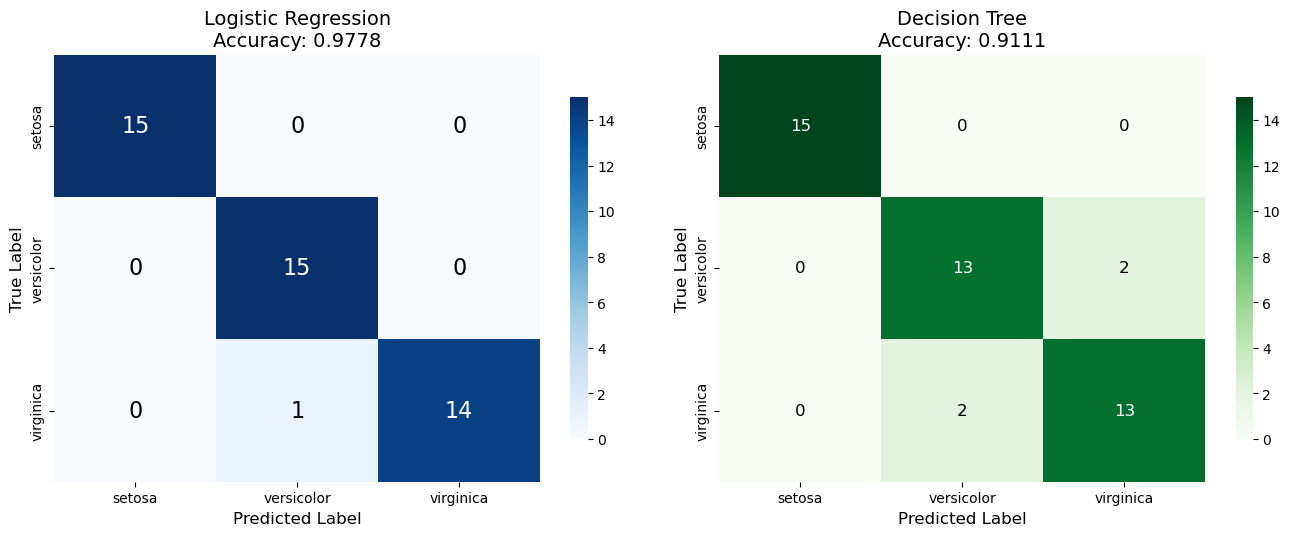

In [19]:
# c. confusion matrix side by side 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression 
cm_lr = confusion_matrix(y_test, y_pred_lr)
ax0 = sns.heatmap(cm_lr, annot=False, cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={"shrink": 0.8},
            ax=axes[0])
# Manually add tex
for i in range(3):
    for j in range(3):
        value = cm_lr[i, j]
        color = "white" if value > 12 else "black"
        ax0.text(j+0.5, i+0.5, str(value),
                ha="center", va="center", color=color, 
                fontsize=16, )
axes[0].set_title(f'Logistic Regression\nAccuracy: {lr_accuracy:.4f}', fontsize=14)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Decision Tree 
cm_dt = confusion_matrix(y_test, y_pred_dt)
ax1 = sns.heatmap(cm_dt, annot=False, cmap='Greens', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={"shrink": 0.8},
            ax=axes[1])
# Manually add text
for i in range(3):
    for j in range(3):
        value = cm_dt[i, j]
        color = "white" if value > 12 else "black"
        ax1.text(j+0.5, i+0.5, str(value),
                ha="center", va="center", color=color, 
                fontsize=12)
axes[1].set_title(f'Decision Tree\nAccuracy: {dt_accuracy:.4f}', fontsize=14)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout(pad=3.0)
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()